<a href="https://colab.research.google.com/github/KaranShah-py/CurrencyConverterUsingPython/blob/master/Data_Analysis_on_Top_1000_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data analysis on Top 1000 Movies dataset***

***Importing the required libraries***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
%matplotlib inline

***Data Collection Stage :- Loading the dataset***

In [6]:
given_dataset = pd.read_csv('imdb_top_1000.csv')
given_dataset.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


***Data Cleaning Stage***

***Dropping all the null values***

In [8]:
given_dataset.shape

(1000, 16)

In [3]:
given_dataset = given_dataset.dropna()
given_dataset.shape

(714, 16)

***Dropping the Poster Link and Overview***

In [ ]:
given_dataset = given_dataset.drop(['Poster_Link','Overview'],axis=1)
given_dataset.shape

(714, 14)

***Data Transformation Stage***

***Converting the runtime and gross column values from String to Int.***

In [ ]:
def slicing_gross(string):
  new_string = string.replace(',','')
  return int(new_string)

def slicing_runtime(string):
  count = 0
  for i in string:
    if i =='m':
      return int(string[:count])
    count += 1

***Runtime column***

In [ ]:
runtime_values = given_dataset['Runtime'].values
runtime_li = list()
for i in runtime_values:
  new_st = slicing_runtime(i)
  runtime_li.append(new_st)
runtime_array = np.array(runtime_li)
given_dataset = given_dataset.drop(columns=['Runtime'], axis=1)      # Removing the given runtime column with string type values
given_dataset['Runtime'] = runtime_array                             # Adding the numeric type runtime column

***Gross column***

In [ ]:
gross_values = given_dataset['Gross'].values
li = list()
for i in gross_values:
  new_st = slicing_gross(i)
  li.append(new_st)
gross_array = np.array(li)
given_dataset = given_dataset.drop(columns=['Gross'], axis=1)     # Removing the given gross column with string values
given_dataset['Gross'] = gross_array                              # Adding the numeric type gross column

***The new Gross and runtime columns***

In [ ]:
given_dataset['Gross'].describe()

count    7.140000e+02
mean     7.851359e+07
std      1.149780e+08
min      1.305000e+03
25%      6.157408e+06
50%      3.485015e+07
75%      1.024641e+08
max      9.366622e+08
Name: Gross, dtype: float64

In [ ]:
given_dataset['Runtime'].describe()

count    714.000000
mean     123.715686
std       25.887535
min       72.000000
25%      104.250000
50%      120.000000
75%      136.000000
max      238.000000
Name: Runtime, dtype: float64

In [ ]:
given_dataset.head(3)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,142,28341469
1,The Godfather,1972,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,175,134966411
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,152,534858444


***Now we can perform data analytics***

In [ ]:
given_dataset.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Gross
count,714.000000,714.000000,7.140000e+02,714.000000,7.140000e+02
mean,7.937115,77.158263,3.561348e+05,123.715686,7.851359e+07
std,0.293278,12.401144,3.539011e+05,25.887535,1.149780e+08
min,7.600000,28.000000,2.522900e+04,72.000000,1.305000e+03
25%,7.700000,70.000000,9.600975e+04,104.250000,6.157408e+06
50%,7.900000,78.000000,2.366025e+05,120.000000,3.485015e+07
75%,8.100000,86.000000,5.077922e+05,136.000000,1.024641e+08
max,9.300000,100.000000,2.343110e+06,238.000000,9.366622e+08


***Error of data in Released_Year Column ('PG').***

In [ ]:
given_dataset[given_dataset['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross
966,Apollo 13,PG,U,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,140,173837933


In [ ]:
given_dataset['Released_Year'] = given_dataset['Released_Year'].replace(['PG'],1995)

In [ ]:
given_dataset[given_dataset['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross
966,Apollo 13,1995,U,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,140,173837933


In [ ]:
given_dataset['Released_Year'] = given_dataset['Released_Year'].astype(int)

***Adding a new column 'Decade' in the dataset***

In [ ]:
def extract_decade(x):
    return str(int(x/10)*10)+"s"

In [ ]:
given_dataset['Decade'] = given_dataset['Released_Year'].apply(extract_decade)

In [ ]:
given_dataset.head(1)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross,Decade
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,142,28341469,1990s


***Creating Genre type column***


In [ ]:
genre_values = given_dataset['Genre'].values

In [ ]:
def check_genre_type(string):
  for i in string:
    if i == ',':
      return True
  return False

In [ ]:
genre_type = list()
for i in genre_values:
  response = check_genre_type(i)
  if response == True:
    genre_type.append('Multi Genre')
  elif response == False:
    genre_type.append('Single Genre')

In [ ]:
genre_type_array = np.array(genre_type)

In [ ]:
given_dataset['Genre Type'] = genre_type_array

# ***QUESTIONS TO BE ANALYZED***

***1. Decade wise change in IMDB Ratings.//***

***2. IMDB rating and Gross collection (DECADE WISE)//***

***3. Does Number of votes affect the Meta_score.***

***4.a Number of Single and Multi Genre movies with respect to decades.//***

***4.b Single Genre Movies vs Multi Genre Movies gross collection//***

***4.c Display the number of movies made and it's the Genre count w.r.t IMDB Ratings.//***

***5. How many movies are being made in a decade?***

***6. Display the number of movies that exceed 2hrs of runtime***

***7. The rise and fall of the number of votes in a decade***

***9. Does the runtime of any film affect the number of votes.***

***10. Analysis of Runtime and Gross w.r.t the Top 10 lengthy and shortest movies***

***11. Display the Name of the least and most popular movie***

***12. Classifying the ratings into their respective categories: Good, Very Good, Excellent***

***13. Display the number of movies in each certificate rating***

***14. The movies with most number of IMDB ratings w.r.t it's certification.***

***15. Display the Top 10 actors who have appeared in most number of films***

***16. Which is the most popular Genre?***

***17. Votes to collection correlation***

# ***SOLUTIONS***

***1. Decade wise change in IMDB Ratings***.

Text(0.5, 1.0, 'DECASE vs IMDB')

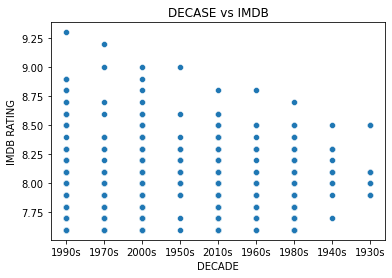

In [ ]:
ax = sns.scatterplot(x='Decade', y='IMDB_Rating', data=given_dataset)
ax.set_xlabel('DECADE')
ax.set_ylabel('IMDB RATING')
ax.set_title('DECASE vs IMDB')

***2. Does IMDB affect the Gross Collection***

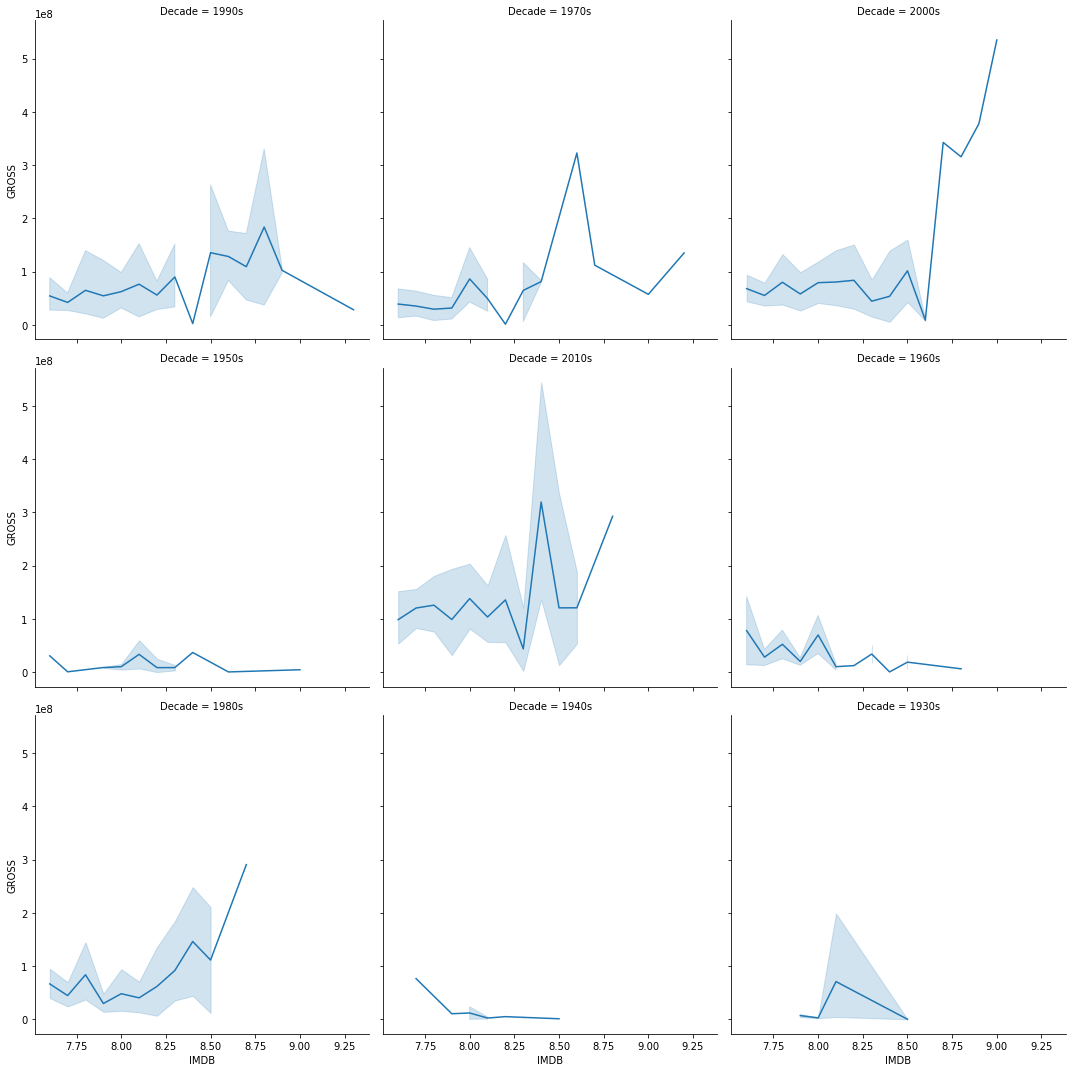

In [ ]:
rel = sns.relplot(x='IMDB_Rating', y='Gross', col='Decade', col_wrap=3, data=given_dataset, kind='line')
rel.set_xlabels('IMDB')
rel.set_ylabels('GROSS')

***3. Does Number of votes affect the Meta_score.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


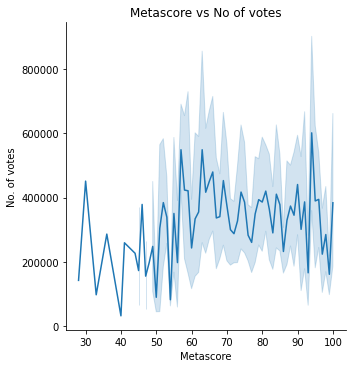

In [ ]:
sns.relplot('Meta_score','No_of_Votes',data=given_dataset,kind='line')
plt.title('Metascore vs No of votes')
plt.xlabel('Metascore')
plt.ylabel('No. of votes')
plt.show()

***4.a Number of Single and Multi Genre movies with respect to decades.***

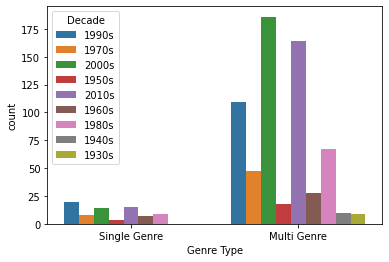

In [ ]:
sns.countplot(x=given_dataset['Genre Type'], hue=given_dataset['Decade'])

***4.b Single Genre Movies vs Multi Genre Movies gross collection***

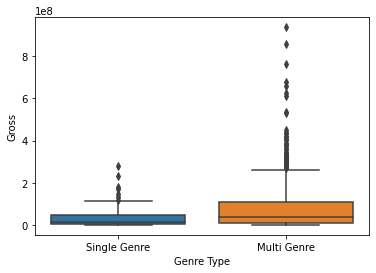

In [ ]:
sns.boxplot(y=given_dataset['Gross'], x=given_dataset['Genre Type'])

**4.c Display the number of movies made and it's the Genre count w.r.t IMDB Ratings.**

In [ ]:
#To count the number of Genres
def count_genre(str):
  count=1
  for i in str:
    if i == ',':
      count=count+1
  return count

In [ ]:
li=[]
for i in given_dataset['Genre']:
  print(i)
  #print(count_genre(i))
  li.append(count_genre(i))


Drama
Crime, Drama
Action, Crime, Drama
Crime, Drama
Crime, Drama
Action, Adventure, Drama
Crime, Drama
Biography, Drama, History
Action, Adventure, Sci-Fi
Drama
Action, Adventure, Drama
Drama, Romance
Western
Action, Adventure, Drama
Action, Sci-Fi
Biography, Crime, Drama
Action, Adventure, Fantasy
Drama
Comedy, Drama, Thriller
Adventure, Drama, Sci-Fi
Crime, Drama
Animation, Adventure, Family
Drama, War
Crime, Drama, Fantasy
Comedy, Drama, Romance
Crime, Drama, Mystery
Crime, Drama, Thriller
Action, Adventure, Fantasy
Action, Adventure, Drama
Crime, Drama, Thriller
Drama, Music
Biography, Comedy, Drama
Drama, Mystery, Sci-Fi
Crime, Drama, Thriller
Biography, Drama, Music
Action, Adventure, Drama
Drama
Crime, Mystery, Thriller
Action, Crime, Drama
Animation, Adventure, Drama
Action, Sci-Fi
Drama, Romance
Adventure, Comedy, Sci-Fi
Western
Horror, Mystery, Thriller
Drama, Romance, War
Comedy, Drama, Family
Comedy, Drama, Romance
Drama
Animation, Drama, Fantasy
Animation, Action, Adventu

In [ ]:
given_dataset['Genre count'] = np.array(li)
given_dataset.head()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross,Decade,Genre Type,Genre count
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,142,28341469,1990s,Single Genre,1
1,The Godfather,1972,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,175,134966411,1970s,Multi Genre,2
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,152,534858444,2000s,Multi Genre,3
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,202,57300000,1970s,Multi Genre,2
4,12 Angry Men,1957,U,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,96,4360000,1950s,Multi Genre,2


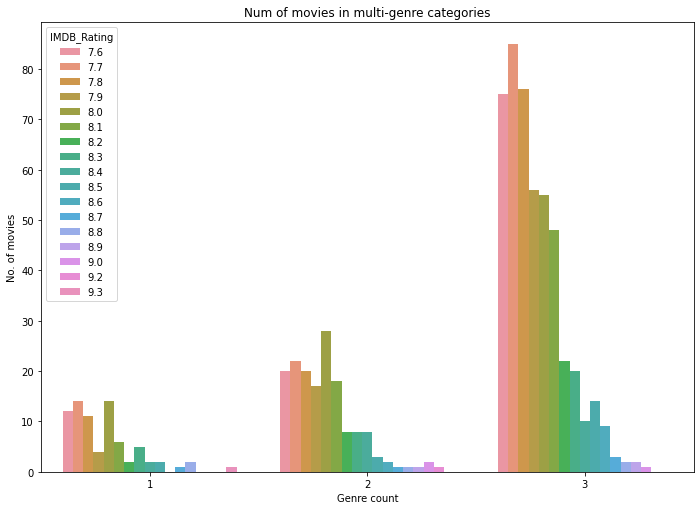

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=given_dataset['Genre count'], hue=given_dataset['IMDB_Rating'])
plt.title('Num of movies in multi-genre categories')
plt.ylabel('No. of movies')
plt.show()

***5. How many movies are being made in a decade?***

---



In [ ]:
val_counts_by_dec=given_dataset['Decade'].value_counts()
val_counts_by_dec

2000s    200
2010s    179
1990s    129
1980s     76
1970s     55
1960s     35
1950s     21
1940s     10
1930s      9
Name: Decade, dtype: int64

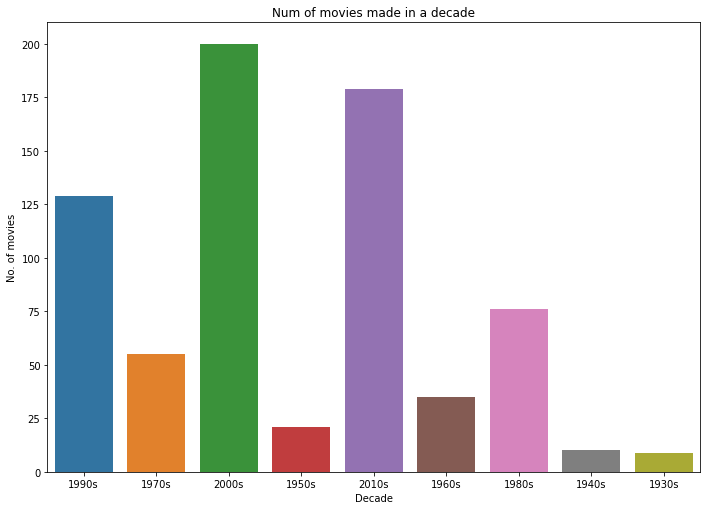

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='Decade',data=given_dataset)
plt.title('Num of movies made in a decade')
plt.ylabel('No. of movies')
plt.show()

***6. Display the number of movies that exceed 2hrs of runtime***

In [ ]:
df_runtime120 = given_dataset[given_dataset['Runtime']>120][['Series_Title','Runtime']]
df_runtime120 = pd.DataFrame(df_runtime120)
df_runtime120.head(10)


,Series_Title,Runtime
0,The Shawshank Redemption,142
1,The Godfather,175
2,The Dark Knight,152
3,The Godfather: Part II,202
5,The Lord of the Rings: The Return of the King,201
6,Pulp Fiction,154
7,Schindler's List,195
8,Inception,148
9,Fight Club,139
10,The Lord of the Rings: The Fellowship of the Ring,178


In [ ]:
df_runtime120.shape #352 movies exceed 2hr runtime

(352, 2)

In [ ]:
import math

def roundup(x):
    return int(math.ceil(x / 10)) * 10

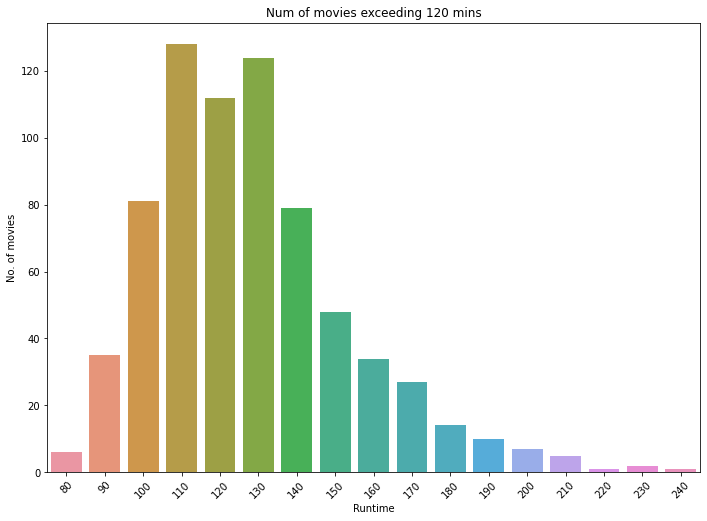

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=45)
sns.countplot(x=given_dataset['Runtime'].apply(roundup))
plt.title('Num of movies exceeding 120 mins')
plt.ylabel('No. of movies')
plt.show()

***7. The rise and fall of the number of votes in a decade***

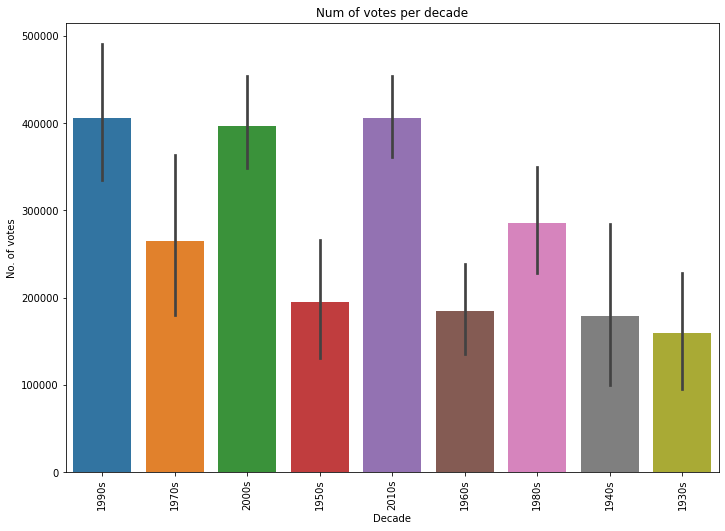

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=90)
sns.barplot(x='Decade',y='No_of_Votes',data=given_dataset)
plt.title('Num of votes per decade')
plt.ylabel('No. of votes')
plt.show()


***8. Top 10 lengthy Movies***

In [ ]:
largest_runtime=given_dataset.nlargest(10,'Runtime')[['Runtime','Series_Title','Gross']]
#in descending order
largest_runtime

,Runtime,Series_Title,Gross
314,238,Gone with the Wind,198676459
116,228,Lawrence of Arabia,44824144
247,224,Lagaan: Once Upon a Time in India,70147
300,212,Ben-Hur,74700000
484,209,The Irishman,7000000
31,207,Shichinin no samurai,269061
3,202,The Godfather: Part II,57300000
820,202,Malcolm X,48169908
5,201,The Lord of the Rings: The Return of the King,377845905
430,197,Doctor Zhivago,111722000


<BarContainer object of 10 artists>

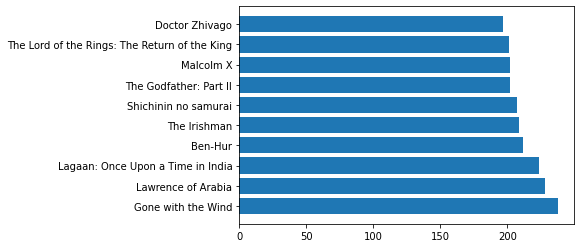

In [ ]:
plt.barh('Series_Title', 'Runtime',data=largest_runtime)

***9. Top 10 shortest movies***

In [ ]:
smallest_runtime=given_dataset.nsmallest(10,'Runtime')[['Runtime','Series_Title','Gross']]
#in ascending order
smallest_runtime

,Runtime,Series_Title,Gross
694,72,La planète sauvage,193817
395,76,The Nightmare Before Christmas,75082668
992,78,The Jungle Book,141843612
237,80,Before Sunset,5820649
640,80,Les triplettes de Belleville,7002255
808,80,Le dîner de cons,4065116
101,81,Toy Story,191796233
799,81,"South Park: Bigger, Longer & Uncut",52037603
954,81,Lola rennt,7267585
530,82,This Is Spinal Tap,188751


<BarContainer object of 10 artists>

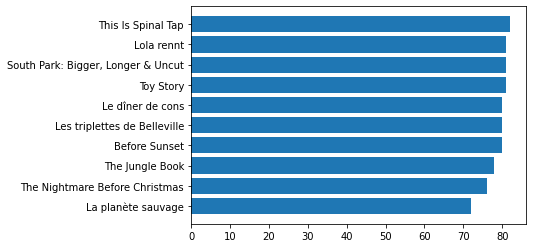

In [ ]:

plt.barh('Series_Title', 'Runtime',data=smallest_runtime)

***10. Analysis of Runtime and Gross w.r.t the Top 10 lengthy and shortest movies***

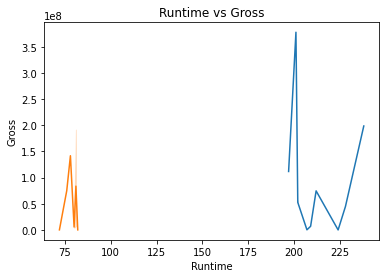

In [ ]:
sns.lineplot(x='Runtime', y='Gross',data=largest_runtime)
sns.lineplot(x='Runtime', y='Gross',data=smallest_runtime)
plt.title('Runtime vs Gross')
plt.show()

***11. Display the Name of the least and most popular movie***

In [ ]:
given_dataset[given_dataset['Gross'].max()==given_dataset['Gross']]

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross,Decade,Genre Type,Genre count
477,Star Wars: Episode VII - The Force Awakens,2015,U,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,138,936662225,2010s,Multi Genre,3


In [ ]:
given_dataset[given_dataset['Gross'].min()==given_dataset['Gross']]

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross,Decade,Genre Type,Genre count
630,Adams æbler,2005,R,"Comedy, Crime, Drama",7.8,51.0,Anders Thomas Jensen,Ulrich Thomsen,Mads Mikkelsen,Nicolas Bro,Paprika Steen,45717,94,1305,2000s,Multi Genre,3


***12. Classifying the ratings into their respective categories: Good, Very Good, Excellent***

In [ ]:
given_dataset['IMDB_Rating'].describe()

count    714.000000
mean       7.937115
std        0.293278
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64

In [ ]:
def rating_category(str):
  if str > 8.9:
    return "Excellent"
  elif str >= 8.0 and str <= 8.9:
    return "Very Good"
  else:
    return "Good"

In [ ]:
given_dataset['Rating Categories'] = given_dataset['IMDB_Rating'].apply(rating_category)

In [ ]:
given_dataset.head()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Runtime,Gross,Decade,Genre Type,Genre count,Rating Categories
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,142,28341469,1990s,Single Genre,1,Excellent
1,The Godfather,1972,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,175,134966411,1970s,Multi Genre,2,Excellent
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,152,534858444,2000s,Multi Genre,3,Excellent
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,202,57300000,1970s,Multi Genre,2,Excellent
4,12 Angry Men,1957,U,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,96,4360000,1950s,Multi Genre,2,Excellent


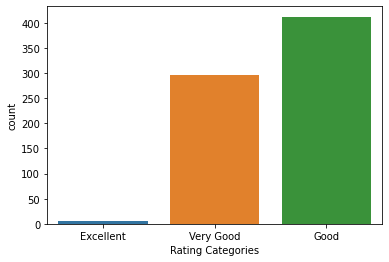

In [ ]:
sns.countplot(x='Rating Categories',data=given_dataset)

In [ ]:
given_dataset[given_dataset['Rating Categories']=='Excellent'].shape

(5, 18)

In [ ]:
given_dataset[given_dataset['Rating Categories']=='Very Good'].shape

(297, 18)

In [ ]:
given_dataset[given_dataset['Rating Categories']=='Good'].shape

(412, 18)

***13. Display the number of movies in each certificate rating***

In [ ]:
cert_series = given_dataset['Certificate'].value_counts()
cert_series

U           183
A           174
UA          142
R           131
PG-13        38
PG           19
G             9
Passed        9
Approved      6
TV-PG         1
U/A           1
GP            1
Name: Certificate, dtype: int64

In [ ]:
cert_series.index

Index(['U', 'A', 'UA', 'R', 'PG-13', 'PG', 'G', 'Passed', 'Approved', 'TV-PG',
       'U/A', 'GP'],
      dtype='object')

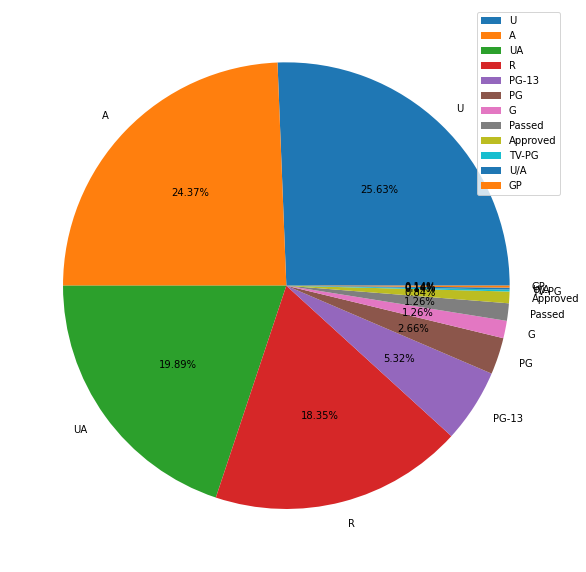

In [ ]:
a4_dims = (10.27, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(cert_series, labels=cert_series.index,autopct='%0.2f%%')
plt.legend()

***14. The movies with most number of IMDB ratings w.r.t it's certification.***

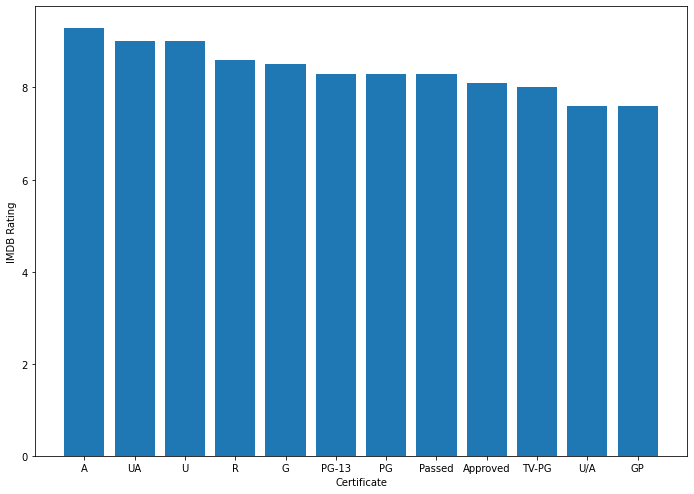

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.bar('Certificate','IMDB_Rating',data=given_dataset)
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.show()

***15. Display the Top 10 actors who have appeared in most number of films***

In [ ]:
given_dataset['Stars']=given_dataset['Star1']+","+given_dataset['Star2']+","+given_dataset['Star3']+","+given_dataset['Star4']

In [ ]:
given_dataset.drop(['Star1','Star2','Star3','Star4'],axis=1)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Runtime,Gross,Decade,Genre Type,Genre count,Rating Categories,Stars
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,2343110,142,28341469,1990s,Single Genre,1,Excellent,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
1,The Godfather,1972,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,175,134966411,1970s,Multi Genre,2,Excellent,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,152,534858444,2000s,Multi Genre,3,Excellent,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,202,57300000,1970s,Multi Genre,2,Excellent,"Al Pacino,Robert De Niro,Robert Duvall,Diane K..."
4,12 Angry Men,1957,U,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,96,4360000,1950s,Multi Genre,2,Excellent,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,"Drama, War, Western",7.6,77.0,Sergio Leone,30144,157,696690,1970s,Multi Genre,3,Good,"Rod Steiger,James Coburn,Romolo Valli,Maria Monti"
991,Kelly's Heroes,1970,GP,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,45338,144,1378435,1970s,Multi Genre,3,Good,"Clint Eastwood,Telly Savalas,Don Rickles,Carro..."
992,The Jungle Book,1967,U,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,166409,78,141843612,1960s,Multi Genre,3,Good,"Phil Harris,Sebastian Cabot,Louis Prima,Bruce ..."
994,A Hard Day's Night,1964,U,"Comedy, Music, Musical",7.6,96.0,Richard Lester,40351,87,13780024,1960s,Multi Genre,3,Good,"John Lennon,Paul McCartney,George Harrison,Rin..."


In [ ]:
li1=[]

for elem in given_dataset['Stars']:
  val = elem.split(',')
  li1.append(val)

li1

[['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler'],
 ['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton'],
 ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine'],
 ['Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton'],
 ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'John Fiedler'],
 ['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom'],
 ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson', 'Bruce Willis'],
 ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley', 'Caroline Goodall'],
 ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Ken Watanabe'],
 ['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Zach Grenier'],
 ['Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean'],
 ['Tom Hanks', 'Robin Wright', 'Gary Sinise', 'Sally Field'],
 ['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef', 'Aldo Giuffrè'],
 ['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom'],
 ['Lilly Wachowski', 'Keanu Reeves', 'Laurence

In [ ]:
li2 = []

for elem2 in li1:
  for item in elem2:
    li2.append(item) 

li2

['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'William Sadler',
 'Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Diane Keaton',
 'Christian Bale',
 'Heath Ledger',
 'Aaron Eckhart',
 'Michael Caine',
 'Al Pacino',
 'Robert De Niro',
 'Robert Duvall',
 'Diane Keaton',
 'Henry Fonda',
 'Lee J. Cobb',
 'Martin Balsam',
 'John Fiedler',
 'Elijah Wood',
 'Viggo Mortensen',
 'Ian McKellen',
 'Orlando Bloom',
 'John Travolta',
 'Uma Thurman',
 'Samuel L. Jackson',
 'Bruce Willis',
 'Liam Neeson',
 'Ralph Fiennes',
 'Ben Kingsley',
 'Caroline Goodall',
 'Leonardo DiCaprio',
 'Joseph Gordon-Levitt',
 'Elliot Page',
 'Ken Watanabe',
 'Brad Pitt',
 'Edward Norton',
 'Meat Loaf',
 'Zach Grenier',
 'Elijah Wood',
 'Ian McKellen',
 'Orlando Bloom',
 'Sean Bean',
 'Tom Hanks',
 'Robin Wright',
 'Gary Sinise',
 'Sally Field',
 'Clint Eastwood',
 'Eli Wallach',
 'Lee Van Cleef',
 'Aldo Giuffrè',
 'Elijah Wood',
 'Ian McKellen',
 'Viggo Mortensen',
 'Orlando Bloom',
 'Lilly Wachowski',
 'Keanu Reev

In [ ]:
y=[]
y=Counter(li2).most_common()

In [ ]:
z= y[ : 10]
z

[('Robert De Niro', 16),
 ('Tom Hanks', 14),
 ('Al Pacino', 13),
 ('Brad Pitt', 12),
 ('Christian Bale', 11),
 ('Leonardo DiCaprio', 11),
 ('Clint Eastwood', 11),
 ('Matt Damon', 11),
 ('Scarlett Johansson', 9),
 ('Ethan Hawke', 9)]

In [ ]:
z = np.array(z)
z_df = pd.DataFrame(z)
z_df

,0,1
0,Robert De Niro,16
1,Tom Hanks,14
2,Al Pacino,13
3,Brad Pitt,12
4,Christian Bale,11
5,Leonardo DiCaprio,11
6,Clint Eastwood,11
7,Matt Damon,11
8,Scarlett Johansson,9
9,Ethan Hawke,9


In [ ]:
z_df=z_df.rename({0:'Star',1:'Num'},axis='columns')
z_df

,Star,Num
0,Robert De Niro,16
1,Tom Hanks,14
2,Al Pacino,13
3,Brad Pitt,12
4,Christian Bale,11
5,Leonardo DiCaprio,11
6,Clint Eastwood,11
7,Matt Damon,11
8,Scarlett Johansson,9
9,Ethan Hawke,9


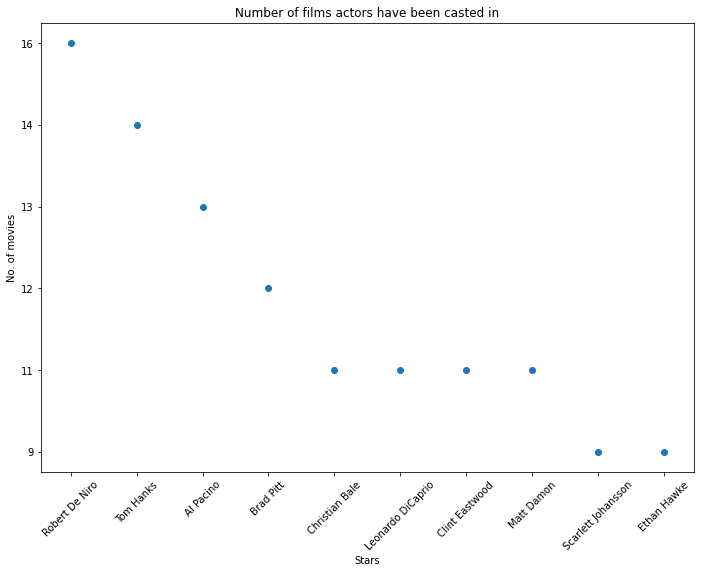

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=45)
plt.gca().invert_yaxis()
plt.scatter('Star','Num',data=z_df)
plt.title("Number of films actors have been casted in")
plt.xlabel("Stars")
plt.ylabel('No. of movies')
plt.show()

***16. Which is the most popular Genre?***

In [ ]:
li4=[]

for elem in given_dataset['Genre']:
  val = elem.split(',')
  li4.append(val)

li4

[['Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Crime', ' Drama'],
 ['Crime', ' Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Crime', ' Drama'],
 ['Biography', ' Drama', ' History'],
 ['Action', ' Adventure', ' Sci-Fi'],
 ['Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Drama', ' Romance'],
 ['Western'],
 ['Action', ' Adventure', ' Drama'],
 ['Action', ' Sci-Fi'],
 ['Biography', ' Crime', ' Drama'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Drama'],
 ['Comedy', ' Drama', ' Thriller'],
 ['Adventure', ' Drama', ' Sci-Fi'],
 ['Crime', ' Drama'],
 ['Animation', ' Adventure', ' Family'],
 ['Drama', ' War'],
 ['Crime', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 ['Crime', ' Drama', ' Mystery'],
 ['Crime', ' Drama', ' Thriller'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Action', ' Adventure', ' Drama'],
 ['Crime', ' Drama', ' Thriller'],
 ['Drama', ' Music'],
 ['Biography', ' Comedy', ' Drama'],
 ['Drama', ' Mystery', ' Sci-Fi'],
 ['Crime', ' Drama',

In [ ]:
li3 = []

for elem2 in li4:
  for item in elem2:
    li3.append(item) 

li3

['Drama',
 'Crime',
 ' Drama',
 'Action',
 ' Crime',
 ' Drama',
 'Crime',
 ' Drama',
 'Crime',
 ' Drama',
 'Action',
 ' Adventure',
 ' Drama',
 'Crime',
 ' Drama',
 'Biography',
 ' Drama',
 ' History',
 'Action',
 ' Adventure',
 ' Sci-Fi',
 'Drama',
 'Action',
 ' Adventure',
 ' Drama',
 'Drama',
 ' Romance',
 'Western',
 'Action',
 ' Adventure',
 ' Drama',
 'Action',
 ' Sci-Fi',
 'Biography',
 ' Crime',
 ' Drama',
 'Action',
 ' Adventure',
 ' Fantasy',
 'Drama',
 'Comedy',
 ' Drama',
 ' Thriller',
 'Adventure',
 ' Drama',
 ' Sci-Fi',
 'Crime',
 ' Drama',
 'Animation',
 ' Adventure',
 ' Family',
 'Drama',
 ' War',
 'Crime',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Crime',
 ' Drama',
 ' Mystery',
 'Crime',
 ' Drama',
 ' Thriller',
 'Action',
 ' Adventure',
 ' Fantasy',
 'Action',
 ' Adventure',
 ' Drama',
 'Crime',
 ' Drama',
 ' Thriller',
 'Drama',
 ' Music',
 'Biography',
 ' Comedy',
 ' Drama',
 'Drama',
 ' Mystery',
 ' Sci-Fi',
 'Crime',
 ' Drama',
 ' Thriller',
 '

In [ ]:
li3 = [x.strip(' ') for x in li3]


In [ ]:
gen_list = []

for gen in li3:
  if gen not in gen_list:
    gen_list.append(gen)

gen_list

['Drama',
 'Crime',
 ' Drama',
 'Action',
 ' Crime',
 ' Adventure',
 'Biography',
 ' History',
 ' Sci-Fi',
 ' Romance',
 'Western',
 ' Fantasy',
 'Comedy',
 ' Thriller',
 'Adventure',
 'Animation',
 ' Family',
 ' War',
 ' Mystery',
 ' Music',
 ' Comedy',
 'Horror',
 ' Action',
 ' Western',
 'Mystery',
 ' Horror',
 ' Sport',
 ' Biography',
 ' Musical',
 ' Film-Noir',
 'Film-Noir',
 'Family']

In [ ]:
y_gen=[]
y_gen=Counter(li3).most_common()

In [ ]:
y_df = np.array(y_gen)
y_gen_df = pd.DataFrame(y_gen)
y_gen_df

,0,1
0,Drama,308
1,Drama,192
2,Action,127
3,Adventure,105
4,Comedy,104
5,Thriller,99
6,Romance,88
7,Crime,74
8,Biography,73
9,Crime,68


In [ ]:
y_gen_df=y_gen_df.rename({0:'Genre',1:'Num'},axis='columns')
y_gen_df

,Genre,Num
0,Drama,308
1,Drama,192
2,Action,127
3,Adventure,105
4,Comedy,104
5,Thriller,99
6,Romance,88
7,Crime,74
8,Biography,73
9,Crime,68


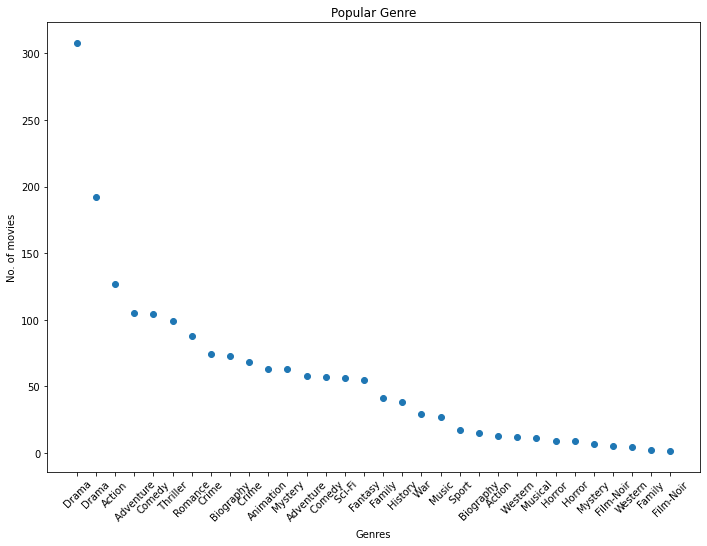

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=45)
plt.scatter('Genre','Num',data=y_gen_df)
plt.title('Popular Genre')
plt.xlabel('Genres')
plt.ylabel('No. of movies')
plt.show()

***17. Votes to collection correlation for Gross collection exceeding 100 million***

In [ ]:
aa=given_dataset[given_dataset['Gross']>100000000][['Series_Title','No_of_Votes','Gross']]
aa=pd.DataFrame(aa)

In [ ]:
aa_comp=aa.head(10)

In [ ]:
def roundup_cr(x):
    return float(round((x / 1000000), 2)) 

aa_comp['Gross_round']=aa_comp['Gross'].apply(roundup_cr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


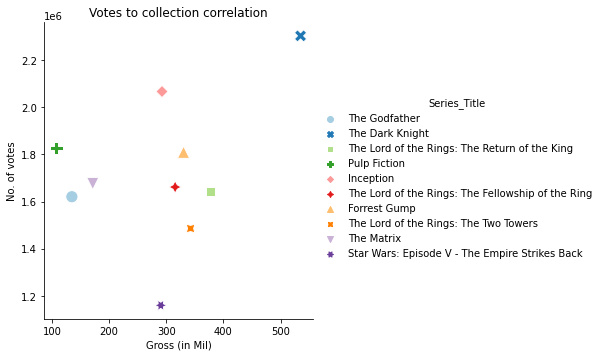

In [ ]:

sns.relplot(x='Gross_round',y='No_of_Votes',hue='Series_Title',style='Series_Title',data=aa_comp,s=150,palette='Paired')
plt.title('Votes to collection correlation')
plt.xlabel('Gross (in Mil)')
plt.ylabel('No. of votes')
plt.show()